# 0. Import necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


#!conda install -c conda-forge geopandas
#import geopandas as gpd

print('Libraries imported.')

Libraries imported.


# 1. Import Dataset

#### Description: 
<p> This section is about importing the dataset correctly into a DataFrame.<p>

#### Important: 
<p> The data contains 26 Swedish counties near and around the capital of Stockholm with a number of features. The data is from 2019 and compounded from official and open data of; 1. demographic data provided by SCB (Statistics Sweden), 2. crime data provided by BRA (Swedish National Council for Crime Prevention).<p>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/mikaelhagglund/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import the locally stored CSV-file, containing demographic data from SCB and crime data from BRA, 
# for each county in the Stockholm region. Assign the csv-file to a DataFrame. 

county_data = pd.read_csv('/Users/mikaelhagglund/Desktop/Python/Coursera/IBM Data Science Professional Certificate/9. Applied Data Science Capstone/Capstone Project/CountyData2019.csv', delimiter = ';')
df_county = pd.DataFrame(county_data)
df_county.head()

County   Latitude  Longitude  Population  AverageAge  HighEducationRate  \
0  Norrtälje  59.766667  18.700000       62622        45.4               16.1   
1    Sigtuna  59.633333  17.883333       48964        38.1               20.4   
2  Nynäshamn  58.933333  17.883333       28575        42.7               16.4   
3   Huddinge  59.233333  17.983333      112848        37.6               29.6   
4    Lidingö  59.366667  18.183333       48123        41.4               47.4   

   UnemploymentRate  EarlyRetireesRate  SupportedRate  BusinessClimateRanking  \
0               4.7                5.5           12.5                     196   
1               7.5                3.5           10.5                      47   
2               5.8                4.5           12.7                     201   
3               6.4                2.7            9.7                     169   
4               3.8                2.1            6.6                      55   

   TaxRevenuePerCapita  StateSubsidiesPerCapita  CostsPerCapita  TotalCrimes  \
0                41917                    12635           53984         7431   
1                43278                    10864           52770         7049   
2                43952                     9383           52886         3509   
3                45717                     8926           53196        13801   
4                62449                    -6342           55765         3630   

   TotalCrimesPer100000Capita  ViolationLifeDeath  \
0                       11948                 665   
1                       14520                 627   
2                       12342                 298   
3                       12291                1024   
4                        7567                 232   

   ViolationLifeDeathPer100000Capita  ViolationFreedomPeace  \
0                               1069                    869   
1                               1292                    733   
2                               1048                    356   
3                                912                   1285   
4                                484                    349   

   ViolationFreedomPeacePer100000Capita  TheftRobberyEtc  \
0                                  1397             1929   
1                                  1510             1823   
2                                  1252              964   
3                                  1144             4287   
4                                   728             1193   

   TheftRobberyEtcPer100000Capita  
0                            3102  
1                            3755  
2                            3390  
3                            3818  
4                            2487

#### Comments on above findings: 
<p> As seen in the above output, each county in the dataset has a number of parameters such as; lat/long koordinates, demograpic data (from SCB) and crime data (from BRA). </p>

In [5]:
# What are the shape of the DataFrame?
df_county.shape

(26, 21)

# 2. Analyzing Individual Feature Patterns using Visualization

#### Description: 
<p> This section will begin the journey of understanding the data by using correlations, visualizations and other individual feature patterns. <p>

In [6]:
# What are the data types of the DataFrame?
print(df_county.dtypes)

County                                   object
Latitude                                float64
Longitude                               float64
Population                                int64
AverageAge                              float64
HighEducationRate                       float64
UnemploymentRate                        float64
EarlyRetireesRate                       float64
SupportedRate                           float64
BusinessClimateRanking                    int64
TaxRevenuePerCapita                       int64
StateSubsidiesPerCapita                   int64
CostsPerCapita                            int64
TotalCrimes                               int64
TotalCrimesPer100000Capita                int64
ViolationLifeDeath                        int64
ViolationLifeDeathPer100000Capita         int64
ViolationFreedomPeace                     int64
ViolationFreedomPeacePer100000Capita      int64
TheftRobberyEtc                           int64
TheftRobberyEtcPer100000Capita          

In [8]:
# Calculating the correlation between the "int64" and "float64" parameters with a diagonal of 1.0
df_county.corr()

Latitude  Longitude  Population  \
Latitude                              1.000000   0.416372   -0.033041   
Longitude                             0.416372   1.000000    0.047453   
Population                           -0.033041   0.047453    1.000000   
AverageAge                            0.190557   0.500176   -0.113230   
HighEducationRate                     0.131658   0.143798    0.213043   
UnemploymentRate                     -0.247661  -0.422402    0.132738   
EarlyRetireesRate                     0.137766   0.089550   -0.014704   
SupportedRate                        -0.224727  -0.261135    0.036214   
BusinessClimateRanking               -0.367590   0.165450    0.089379   
TaxRevenuePerCapita                   0.041176   0.146612   -0.002786   
StateSubsidiesPerCapita              -0.130072  -0.260858   -0.186234   
CostsPerCapita                       -0.210825  -0.263645   -0.338349   
TotalCrimes                          -0.028829   0.031089    0.997459   
TotalCrimesPer100000Capita           -0.056476  -0.179179    0.682841   
ViolationLifeDeath                   -0.042168   0.021933    0.997388   
ViolationLifeDeathPer100000Capita    -0.136468  -0.294100    0.298431   
ViolationFreedomPeace                -0.030696   0.033866    0.998350   
ViolationFreedomPeacePer100000Capita  0.025020  -0.062219    0.346284   
TheftRobberyEtc                      -0.020495   0.041379    0.997194   
TheftRobberyEtcPer100000Capita        0.065522   0.045073    0.651895   

                                      AverageAge  HighEducationRate  \
Latitude                                0.190557           0.131658   
Longitude                               0.500176           0.143798   
Population                             -0.113230           0.213043   
AverageAge                              1.000000           0.042402   
HighEducationRate                       0.042402           1.000000   
UnemploymentRate                       -0.411945          -0.485022   
EarlyRetireesRate                       0.270390          -0.742800   
SupportedRate                          -0.062628          -0.771457   
BusinessClimateRanking                  0.287575          -0.483319   
TaxRevenuePerCapita                     0.283461           0.834988   
StateSubsidiesPerCapita                -0.167924          -0.931097   
CostsPerCapita                          0.161858          -0.309805   
TotalCrimes                            -0.100454           0.204720   
TotalCrimesPer100000Capita             -0.328162          -0.074424   
ViolationLifeDeath                     -0.115824           0.163349   
ViolationLifeDeathPer100000Capita      -0.258499          -0.610218   
ViolationFreedomPeace                  -0.106202           0.175622   
ViolationFreedomPeacePer100000Capita   -0.127267          -0.510777   
TheftRobberyEtc                        -0.097070           0.229352   
TheftRobberyEtcPer100000Capita         -0.193859           0.414411   

                                      UnemploymentRate  EarlyRetireesRate  \
Latitude                                     -0.247661           0.137766   
Longitude                                    -0.422402           0.089550   
Population                                    0.132738          -0.014704   
AverageAge                                   -0.411945           0.270390   
HighEducationRate                            -0.485022          -0.742800   
UnemploymentRate                              1.000000           0.525275   
EarlyRetireesRate                             0.525275           1.000000   
SupportedRate                                 0.851559           0.829283   
BusinessClimateRanking                        0.284768           0.426604   
TaxRevenuePerCapita                          -0.633119          -0.721869   
StateSubsidiesPerCapita                       0.637089           0.686965   
CostsPerCapita                                0.141809           0.086949   
TotalCrimes

#### Comment on above findings: 
<p> The table above shows the correlation between all variables. There are a number of positive, negative and non-correlated relationships between the independent variables (demographic data) and the dependent variables (crime data). By looking through the correlation result in the table, I will choose a number of paired variables to explore further in the next section. <p> 

### 2.1 Individual Feature Exploration

#### Description
<p> This sub-section will do some individual feature exploration and visualization on a number of interesting features chosen based on the previous performed correlaion map of the DataFrame. <p>

#### 2.1.1 "UnemploymentRate" as potential predictor variable of "TotalCrimesPer100000Capita"

(0, 22473.754524855663)

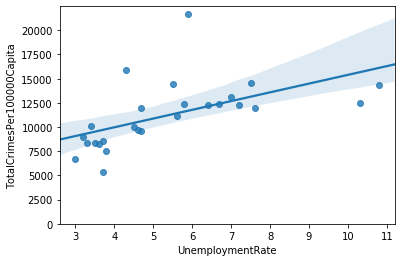

In [9]:
# "UnemploymentRate" as potential predictor variable of "TotalCrimesPer100000Capita"
sns.regplot(x="UnemploymentRate", y="TotalCrimesPer100000Capita", data=df_county)
plt.ylim(0,)

In [10]:
# How well does "UnemploymentRate" correlate with "TotalCrimesPer100000Capita"?
df_county[["UnemploymentRate", "TotalCrimesPer100000Capita"]].corr()

UnemploymentRate  TotalCrimesPer100000Capita
UnemploymentRate                    1.000000                    0.558053
TotalCrimesPer100000Capita          0.558053                    1.000000

#### Comment on above findings: 
<p> The scatterplot shows a positiv linear relationship between "UnemploymentRate" and "TotalCrimesPer100000Capita". The correlation confirms that. Meaning that when a county's unemployment rate 
increases the reported total crimes (per 100.000 capita) tends to increase as well. <p> 

#### 2.1.2 "CostPerCapita" as potential predictor variable of "TheftRobberyEtcPer100000Capita"

(0, 7063.192430187737)

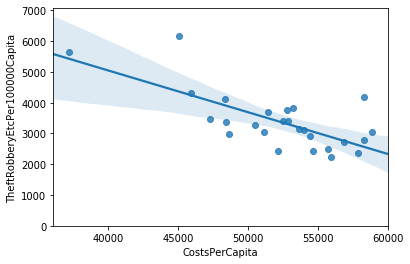

In [11]:
# "CostPerCapita" as potential predictor variable of "TheftRobberyEtcPer100000Capita"
sns.regplot(x="CostsPerCapita", y="TheftRobberyEtcPer100000Capita", data=df_county)
plt.ylim(0,)

In [16]:
# How well does "CostsPerCapita" correlate with "TheftRobberyEtcPer100000Capita"?
df_county[["CostsPerCapita", "TheftRobberyEtcPer100000Capita"]].corr()

CostsPerCapita  TheftRobberyEtcPer100000Capita
CostsPerCapita                        1.000000                       -0.712666
TheftRobberyEtcPer100000Capita       -0.712666                        1.000000

#### Comment on above findings: 
<p> The scatterplot shows a negative linear relationship between "CostsPerCapita" and "TheftRobberyEtcPer100000Capita". The correlation confirms that. Meaning that when a county's cost per capita 
increases the reported thefts, robberies and similar crimes (per 100.000 capita) tends to decrease as well.<p> 

#### 2.1.3 "SupportedRate" as potential predictor variable of "ViolationLifeDeathPer100000Capita"

(0, 1847.3921655818338)

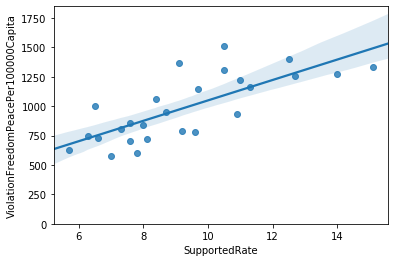

In [17]:
# "SupportedRate" as potential predictor variable of "ViolationFreedomPeacePer100000Capita"
sns.regplot(x="SupportedRate", y="ViolationFreedomPeacePer100000Capita", data=df_county)
plt.ylim(0,)

In [18]:
# How well does "SupportedRate" correlate with "ViolationLifeDeathPer100000Capita"?
df_county[["SupportedRate","ViolationLifeDeathPer100000Capita"]].corr()

SupportedRate  \
SupportedRate                           1.000000   
ViolationLifeDeathPer100000Capita       0.817849   

                                   ViolationLifeDeathPer100000Capita  
SupportedRate                                               0.817849  
ViolationLifeDeathPer100000Capita                           1.000000

#### Comment on above findings: 
<p> The scatterplot shows a strong positive linear relationship between "SupportedRate" and "ViolationLifeDeathPer100000Capita". The correlation confirms that. Meaning that when a county's supported rate
increases the reported violation of life and death crimes (per 100.000 capita) tends to increase as well.<p> 

#### 2.1.4 "UnemploymentRate" as potential predictor variable of "ViolationFreedomPeacePer100000Capita"

(0, 2036.5778623147337)

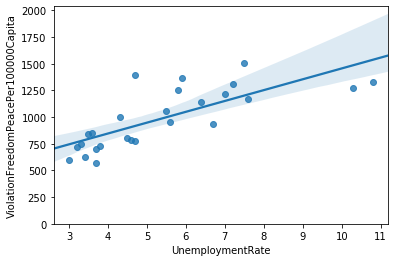

In [19]:
# "UnemploymentRate" as potential predictor variable of "ViolationFreedomPeacePer100000Capita"
sns.regplot(x="UnemploymentRate", y="ViolationFreedomPeacePer100000Capita", data=df_county)
plt.ylim(0,)

In [20]:
# How well does "UnemploymentRate" correlate with "ViolationFreedomPeacePer100000Capita"?
df_county[["UnemploymentRate", "ViolationFreedomPeacePer100000Capita"]].corr()

UnemploymentRate  \
UnemploymentRate                              1.000000   
ViolationFreedomPeacePer100000Capita          0.758752   

                                      ViolationFreedomPeacePer100000Capita  
UnemploymentRate                                                  0.758752  
ViolationFreedomPeacePer100000Capita                              1.000000

#### Comment on above findings: 
<p> The scatterplot shows a strong positive linear relationship between "UnemploymentRate" and "ViolationFreedomPeacePer100000Capita". The correlation confirms that. Meaning that when a county's unemployment rate increases the reported violation of freedom and peace crimes (per 100.000 capita) tends to increase as well.<p> 

#### 2.2 Four crime features correlation to each other

In [22]:
# How well does the five crime features correlate to each other?
df_county[["TotalCrimesPer100000Capita", "ViolationLifeDeathPer100000Capita", "ViolationFreedomPeacePer100000Capita", "TheftRobberyEtcPer100000Capita"]].corr()

TotalCrimesPer100000Capita  \
TotalCrimesPer100000Capita                              1.000000   
ViolationLifeDeathPer100000Capita                       0.756402   
ViolationFreedomPeacePer100000Capita                    0.773029   
TheftRobberyEtcPer100000Capita                          0.788633   

                                      ViolationLifeDeathPer100000Capita  \
TotalCrimesPer100000Capita                                     0.756402   
ViolationLifeDeathPer100000Capita                              1.000000   
ViolationFreedomPeacePer100000Capita                           0.932766   
TheftRobberyEtcPer100000Capita                                 0.280327   

                                      ViolationFreedomPeacePer100000Capita  \
TotalCrimesPer100000Capita                                        0.773029   
ViolationLifeDeathPer100000Capita                                 0.932766   
ViolationFreedomPeacePer100000Capita                              1.000000   
TheftRobberyEtcPer100000Capita                                    0.405169   

                                      TheftRobberyEtcPer100000Capita  
TotalCrimesPer100000Capita                                  0.788633  
ViolationLifeDeathPer100000Capita                           0.280327  
ViolationFreedomPeacePer100000Capita                        0.405169  
TheftRobberyEtcPer100000Capita                              1.000000

#### Comment on above findings: 
<p> The correlations between the DataFrame's five crime features; 1. "TotalCrimesPer100000Capita", 2. "ViolationLifeDeathPer100000Capita", 3. "ViolationFreedomPeacePer100000Capita" and 4. "TheftRobberyEtcPer100000Capita" are shown above. 
    
The result shows, as can be expected, that there are high positiv correlation between 1. and 2., 3. and 4. respectively. Meaning that if 1. "TotalCrimesPer100000Capita" increases, each of the four other features tends to increase as well. That makes sense.

Interesting to note is that crime feature 4. has a low positive correlation with 2. and 3. Meaning that an increase of 4. "TheftRobberyEtcPer100000Capita" leads to a slightly increase of 2. and 3. but not as much as one could expect. <p> 

# 3. Descrpitive Statistical Analysis

#### Description: 
<p> This section will begin performe some basic statistics on the DataFrame's variables. <p>

In [23]:
# Apply the method describe on the DataFrame for some basic statistics.
df_county.describe()

Latitude  Longitude     Population  AverageAge  HighEducationRate  \
count  26.000000  26.000000      26.000000   26.000000          26.000000   
mean   59.360535  18.010934   91460.807692   39.738462          30.876923   
std     0.177075   0.301977  182371.708129    1.765690          10.980940   
min    58.933333  17.400000   11914.000000   37.500000          16.100000   
25%    59.233333  17.845833   33165.250000   39.025000          22.400000   
50%    59.365000  18.000000   48648.500000   39.250000          28.300000   
75%    59.448475  18.179166   81819.250000   40.425000          39.550000   
max    59.766667  18.700000  974073.000000   45.400000          57.900000   

       UnemploymentRate  EarlyRetireesRate  SupportedRate  \
count         26.000000          26.000000      26.000000   
mean           5.396154           2.988462       9.296154   
std            2.090068           0.871471       2.440243   
min            3.000000           1.700000       5.700000   
25%            3.700000           2.400000       7.600000   
50%            4.700000           2.800000       8.900000   
75%            6.625000           3.575000      10.800000   
max           10.800000           5.500000      15.100000   

       BusinessClimateRanking  TaxRevenuePerCapita  StateSubsidiesPerCapita  \
count               26.000000            26.000000                26.000000   
mean                87.538462         48761.076923              4583.961538   
std                 70.737956          7286.911713              8367.753555   
min                  1.000000         39976.000000            -15958.000000   
25%                 33.500000         43421.500000              -585.500000   
50%                 56.000000         47873.000000              6081.500000   
75%                163.500000         51929.250000              9622.250000   
max                208.000000         71385.000000             18824.000000   

       CostsPerCapita    TotalCrimes  TotalCrimesPer100000Capita  \
count       26.000000      26.000000                   26.000000   
mean     52159.692308   14227.538462                11234.115385   
std       4922.233678   40035.707928                 3385.938408   
min      37195.000000     639.000000                 5319.000000   
25%      49096.750000    3528.500000                 8674.250000   
50%      52828.000000    5817.500000                11533.500000   
75%      55493.250000   10212.000000                12479.000000   
max      58902.000000  209494.000000                21639.000000   

       ViolationLifeDeath  ViolationLifeDeathPer100000Capita  \
count           26.000000                          26.000000   
mean           874.961538                         812.000000   
std           2066.024733                         265.127441   
min             41.000000                         341.000000   
25%            236.500000                         593.500000   
50%            376.000000                         808.000000   
75%            661.000000                        1037.250000   
max          10875.000000                        1292.000000   

       ViolationFreedomPeace  ViolationFreedomPeacePer100000Capita  \
count              26.000000                             26.000000   
mean             1065.653846                            987.653846   
std              2508.961872                            279.850237   
min                69.000000                            574.000000   
25%               290.500000                            757.250000   
50%               541.000000                            942.000000   
75%               862.750000                           1243.500000   
max             13229.000000                           1510.000000   

       TheftRobberyEtc  TheftRobberyEtcPer100000Capita  
count        26.000000                       26.000000  
mean       4147.192308                     3397.653846  
std       11389.261384                      935.163384  
min

# 4. Correlation

#### Description: 
<p> This section will calculate the Pearson Correlation Coefficient and P-value between a number of chosen and paired variables. <p>
    
    
<b>Pearson Correlation</b>:
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [24]:
# Importing the necessary stats module in the scipy library.
from scipy import stats

#### 4.1.1 "UnemploymentRate" vs. "TotalCrimesPer100000Capita"

In [25]:
pearson_coef, p_value = stats.pearsonr(df_county["UnemploymentRate"], df_county["TotalCrimesPer100000Capita"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5580529511839847  with a P-value of P = 0.003051726824910994


#### Comment on above findings: 
<p>Since the p-value is $<$ 0.05 it is moderate evidence that the correlation between UnemploymentRate and TotalCrimesPer100000Capita is statistically significant, although the linear relationship isn't extremely strong (~0.558)</p>

#### 4.1.2 "CostsPerCapita" vs. "TheftRobberyEtcPer100000Capita"

In [26]:
pearson_coef, p_value = stats.pearsonr(df_county['CostsPerCapita'], df_county['TheftRobberyEtcPer100000Capita'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7126664964464178  with a P-value of P = 4.4070626415430645e-05


#### Comment on above findings: 
<p>Since the p-value is $<$ 0.001 there is strong evidence that the correlation between CostsPerCapita and TheftRobberyEtcPer100000Capita is statistically significant, the linear relationship is quite strong (~-0.713)</p>

#### 4.1.3 "SupportedRate" vs. "ViolationLifeDeathPer100000Capita"

In [27]:
pearson_coef, p_value = stats.pearsonr(df_county['SupportedRate'], df_county['ViolationLifeDeathPer100000Capita'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8178488264591168  with a P-value of P = 3.36186644284745e-07


#### Comment on above findings: 
<p>Since the p-value is $<$ 0.001 there is strong evidence that the correlation between SupportedRate and ViolationLifeDeathPer100000Capita is statistically significant, the linear relationship is strong (~0.818)</p>

#### 4.1.4 "UnemploymentRate" vs. "ViolationFreedomPeacePer100000Capita"

In [28]:
pearson_coef, p_value = stats.pearsonr(df_county['UnemploymentRate'], df_county['ViolationFreedomPeacePer100000Capita'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7587519649376838  with a P-value of P = 7.041049805811567e-06


#### Comment on above findings: 
<p>Since the p-value is $<$ 0.001 there is strong evidence that the correlation between UnemploymentRate and ViolationFreedomPeacePer100000Capita is statistically significant, the linear relationship is strong (~0.759)</p>

# 5. Folium map visualization

#### Description: 
<p> This section will use Folium to visualize the four crime variables to one map each. <p>

In [29]:
# Import the GeoJson data stored locally.
sthlm_geo = r'/Users/mikaelhagglund/Desktop/Python/Coursera/IBM Data Science Professional Certificate/9. Applied Data Science Capstone/Capstone Project/region-stockholm-kommuner.geojson'


#### 5.1 Folium map of "TotalCrimesPer100000Capita"

In [101]:
# Create a Folium map over the 26 counties around Stockholm found in the DataFrame "df_county" 
# and the GeoJson "sthlm_geo". Grade the counties based on Total number of reported crimes 
# in 2019 per 100.000 inhabitants.

sthlm_map_TotalCrimes = folium.Map(location=[59.35,18.066667], zoom_start=9)
sthlm_map_TotalCrimes.choropleth(
    geo_data=sthlm_geo,
    name="Stockholm counties' total crimes in 2019",
    data=df_county,
    columns=['County','TotalCrimesPer100000Capita'],
    key_on='feature.properties.kom_namn',
    fill_color='YlOrRd', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Total number of reported crimes in 2019 per 100.000 inhabitants',
    highlight=True
)
sthlm_map_TotalCrimes

#### Comment on above findings: 
<p> The Folium map shows that the highest number of reported crimes in 2019 per 100.000 inhabitants are in county Stockholm (central), followed by Södertälje (south) and Sigtuna (north west). <p> 

#### 5.2 Folium map of "TheftRobberyEtcPer100000Capita"

In [102]:
# Create a Folium map over the 26 counties around Stockholm found in the DataFrame "df_county" 
# and the GeoJson "sthlm_geo". Grade the counties based on Total number of reported theft, 
# robbery etc. in 2019 per 100.000 inhabitants.

sthlm_map_TheftRobbery = folium.Map(location=[59.35,18.066667], zoom_start=9)
sthlm_map_TheftRobbery.choropleth(
    geo_data=sthlm_geo,
    name="Stockholm counties' total crimes in 2019",
    data=df_county,
    columns=['County','TheftRobberyEtcPer100000Capita'],
    key_on='feature.properties.kom_namn',
    fill_color='YlOrRd', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Total number of reported theft, robbery etc. in 2019 per 100.000 inhabitants',
    highlight=True
)
sthlm_map_TheftRobbery

#### Comment on above findings: 
<p> The Folium map shows that the highest number of reported thefts, robbery etc. in 2019 per 100.000 inhabitants is in county Stockholm (central). The other counties have relatively low rates within this category of crime. <p> 

#### 5.3 Folium map of "ViolationLifeDeathPer100000Capita"

In [103]:
# Create a Folium map over the 26 counties around Stockholm found in the DataFrame "df_county" 
# and the GeoJson "sthlm_geo". Grade the counties based on Total number of reported violation 
# of life and death in 2019 per 100.000 inhabitants.

sthlm_map_ViolationLifeDeath = folium.Map(location=[59.35,18.066667], zoom_start=9)
sthlm_map_ViolationLifeDeath.choropleth(
    geo_data=sthlm_geo,
    name="Stockholm counties' total crimes in 2019",
    data=df_county,
    columns=['County','ViolationLifeDeathPer100000Capita'],
    key_on='feature.properties.kom_namn',
    fill_color='YlOrRd', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Total number of reported violation of life and death in 2019 per 100.000 inhabitants',
    highlight=True
)
sthlm_map_ViolationLifeDeath

#### Comment on above findings: 
<p> The Folium map shows that the highest number of reported violations of life and death etc. in 2019 per 100.000 inhabitants is in county Södertälje (south) and Sigtuna (north west), closely followed by several other counties. <p> 

#### 5.4 Folium map of "ViolationFreedomPeacePer100000Capita"

In [104]:
# Create a Folium map over the 26 counties around Stockholm found in the DataFrame "df_county" 
# and the GeoJson "sthlm_geo". Grade the counties based on Total number of reported violation 
# of freedom and peace in 2019 per 100.000 inhabitants.

sthlm_map_ViolationFreedomPeace = folium.Map(location=[59.35,18.066667], zoom_start=9)
sthlm_map_ViolationFreedomPeace.choropleth(
    geo_data=sthlm_geo,
    name="Stockholm counties' total crimes in 2019",
    data=df_county,
    columns=['County','ViolationFreedomPeacePer100000Capita'],
    key_on='feature.properties.kom_namn',
    fill_color='YlOrRd', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Total number of reported violation of freedom and peace in 2019 per 100.000 inhabitants',
    highlight=True
)
sthlm_map_ViolationFreedomPeace

#### Comment on above findings: 
<p> The Folium map shows that the highest number of reported violations of freedom and peace etc. in 2019 per 100.000 inhabitants is in county Stockholm (central), Sigtuna (north west) and Norrtälje (north), closely followed by several other counties. <p> 

# 6. Foursquare for map visualization

In [49]:
# State the Foursquare credentials
CLIENT_ID = 'TYMBR2J4UJW51Q00HE4CLVLDBKJV1Y2GBOGJFYSGHL3QHKJ4' # my Foursquare ID
CLIENT_SECRET = 'JL5U2MSD5RLVB2TZYSHK0P5NDH5PXUTDBRAERJQUU414ROPN' # my  Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TYMBR2J4UJW51Q00HE4CLVLDBKJV1Y2GBOGJFYSGHL3QHKJ4
CLIENT_SECRET:JL5U2MSD5RLVB2TZYSHK0P5NDH5PXUTDBRAERJQUU414ROPN


In [50]:
# Call Foursquare and generate the result basedo n a number of conditions
latitude = 59.35 # latitude coordinate of Stockholm
longitude = 18.066667  # longitude coordinate of Stockholm
LIMIT = 100 # limit of number of venues returned by Foursquare API
categoryId = '4bf58dd8d48988d12e941735' # the Foursquare categoryID for Police Departments
radius = 50000 # define radius
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    latitude, 
    longitude, 
    VERSION,
    categoryId,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?client_id=TYMBR2J4UJW51Q00HE4CLVLDBKJV1Y2GBOGJFYSGHL3QHKJ4&client_secret=JL5U2MSD5RLVB2TZYSHK0P5NDH5PXUTDBRAERJQUU414ROPN&ll=59.35,18.066667&v=20180604&categoryId=4bf58dd8d48988d12e941735&radius=50000&limit=100'

In [51]:
# Display the result received by Foursquare
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f5f487eef7b920c10708bec'},
 'response': {'venues': [{'id': '4bc84a596501c9b693cc3f29',
    'name': 'Polisen Östermalm',
    'location': {'lat': 59.342415,
     'lng': 18.079652,
     'labeledLatLngs': [{'label': 'display',
       'lat': 59.342415,
       'lng': 18.079652}],
     'distance': 1120,
     'cc': 'SE',
     'city': 'Stockholm',
     'state': 'Storstockholm',
     'country': 'Sverige',
     'formattedAddress': ['Stockholm', 'Sverige']},
    'categories': [{'id': '4bf58dd8d48988d12e941735',
      'name': 'Police Station',
      'pluralName': 'Police Stations',
      'shortName': 'Police Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_policestation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1600080695',
    'hasPerk': False},
   {'id': '50509b03e4b07d3dac42b059',
    'name': 'Passexpeditionen Sollentuna',
    'location': {'lat': 59.42624793779567,
     'lng': 17.

In [52]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_policestations_foursquare = pd.json_normalize(venues)
df_policestations_foursquare

id                                 name  \
0   4bc84a596501c9b693cc3f29                    Polisen Östermalm   
1   50509b03e4b07d3dac42b059          Passexpeditionen Sollentuna   
2   4c628575edd320a1ae07ad29       Stockholms City passexpedition   
3   53147a67498edb7e16937f23                     Säkerhetspolisen   
4   4de9d025e4cdc079f473c45f              Polishuset Flemingsberg   
5   4bf3997c6a31d13adbd1942e                              Polisen   
6   4c402797ce54e21ea014091a                        Polisen Solna   
7   4f54a92ee4b07c31b5c97e39                Passmyndigheten Solna   
8   4d231e685c4ca1cd8b2bb73d                       Polishögskolan   
9   54808aab498eea18a9d13a88                       Polisen Globen   
10  4f50cd55e4b06d23f7628d5a                              Polisen   
11  4c7275b88efc370476eb127d                              Polisen   
12  4f3e8b12e4b0a3e08e834072                     Polismyndigheten   
13  4f3fa204e4b0714790a5b6e0                              Grind 5   
14  589da9ede753561cd3ed306a            Polisstationen Jakobsberg   
15  4f9767d8e4b095a9d3a74414                           Grind 1031   
16  4bb05ab0f964a5203f423ce3                              Polisen   
17  5409a070498ee2920f08f212                        Polisen Klara   
18  4e12e22222713f7d7bdd63f7                   Polisens Hittegods   
19  4e0acac3483bb906b6ac5e9e                  Farsta Polisstation   
20  4b9fa2bef964a520713037e3                     Polisen Huddinge   
21  4e88e001f5b92ed6d83ea1e5                            Tullhuset   
22  4dfee4c652b1d747f6781881                    Polisen Södermalm   
23  4e4367ae1f6e0a1ba5d15026                     Polismyndigheten   
24  4e41344fa809968085328103                     Polisen i Bålsta   
25  504325f1e4b0068b211cb0f9                  Tull / Customs - T5   
26  4e43acaae4cd394059dfc4d8               Västberga Polisstation   
27  4df72fce18a8a7a74301fcb3               Norrtälje Polisstation   
28  5562f4c3498efee5404c24cc  Polisens Utbildningsplats Västberga   
29  4c2b6284d1a10f4741d1f764               Polisen I Nacka Strand   
30  4b55e506f964a52008f527e3                           Polishuset   
31  4cf10454e942548185a267c5                     Checkpoint Cargo   
32  4defa0dcc65bf3f03e9ae9c2                Arresten Flemingsberg   
33  4ec2369db6341cd41fcc3997                           Polishuset   
34  5212110d498e1e599cbd3d5d                     Säkerhetspolisen   
35  4bf6a81e4d5f20a153ab99fe                   Rikspolisstyrelsen   
36  4ba8fdb7f964a5203d013ae3                              Polisen   
37  5142d313e4b00cf8d09eb9b1                 Polisen Täby Centrum   
38  4f147246e4b0472047bbfb01                              Grind 4   
39  4fb0a27ae4b0df0ef827eea8              tingsvägen 7 sollentuna   
40  4d67e501c406f04d5aeef34c                         Gränspolisen   
41  51669b2ce4b0503b742e3dc8                   Polisen Brahegatan   
42  4df60f2c1f6e818dae08f3f7                   Tumba Polisstation   
43  5077d91ae4b05ac93c1629e7                    Familjerättsbyrån   
44  4ea78854775bfe4802ef4b83                              Grind 1   
45  4b1a4876f964a5209fe823e3                              Polisen   
46  4bd96c640115c9b63e307780                       HUDDINGEHÄKTET   
47  50f4113be4b0260aa2f68e46                              Polisen   
48  4ead3809cc21b06a5780e36f                              Polisen   
49  524d60bb498e206e8fefe97e                              Polisen   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1600080695    False   
1   [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1600080695    False   
2   [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1600080695    False   
3   [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1600080695    False   
4   [{'id': '4bf58dd8d48988d12e941735', 'name': 'P...  v-1600080695    False   
5   [{'id': '4bf58dd8d4898

In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_policestations_foursquare.columns if col.startswith('location.')] + ['id']
df_policestations_filtered = df_policestations_foursquare.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_policestations_filtered['categories'] = df_policestations_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_policestations_filtered.columns = [column.split('.')[-1] for column in df_policestations_filtered.columns]

df_policestations_filtered

name      categories        lat        lng  \
0                     Polisen Östermalm  Police Station  59.342415  18.079652   
1           Passexpeditionen Sollentuna  Police Station  59.426248  17.949415   
2        Stockholms City passexpedition  Police Station  59.330521  18.039930   
3                      Säkerhetspolisen  Police Station  59.352618  18.010926   
4               Polishuset Flemingsberg  Police Station  59.217146  17.946920   
5                               Polisen  Police Station  59.444951  18.068562   
6                         Polisen Solna  Police Station  59.355389  18.000718   
7                 Passmyndigheten Solna  Police Station  59.355486  18.002221   
8                        Polishögskolan      University  59.394297  17.995223   
9                        Polisen Globen  Police Station  59.292181  18.081816   
10                              Polisen  Police Station  59.343683  18.056801   
11                              Polisen  Police Station  59.169670  18.140888   
12                     Polismyndigheten  Police Station  59.331353  18.041897   
13                              Grind 5  Police Station  59.653379  17.952433   
14            Polisstationen Jakobsberg  Police Station  59.425620  17.841663   
15                           Grind 1031  Police Station  59.655544  17.957248   
16                              Polisen  Police Station  59.646765  17.938151   
17                        Polisen Klara  Police Station  59.330549  18.057326   
18                   Polisens Hittegods  Police Station  59.330472  18.039507   
19                  Farsta Polisstation  Police Station  59.241417  18.092537   
20                     Polisen Huddinge  Police Station  59.217426  17.947166   
21                            Tullhuset  Police Station  59.646539  17.937156   
22                    Polisen Södermalm  Police Station  59.316821  18.057789   
23                     Polismyndigheten  Police Station  59.636951  17.082946   
24                     Polisen i Bålsta  Police Station  59.566566  17.531728   
25                  Tull / Customs - T5  Police Station  59.651465  17.931793   
26               Västberga Polisstation  Police Station  59.291893  18.010757   
27               Norrtälje Polisstation  Police Station  59.757032  18.697307   
28  Polisens Utbildningsplats Västberga  Police Station  59.289420  18.015686   
29               Polisen I Nacka Strand  Police Station  59.314999  18.164455   
30                           Polishuset  Police Station  59.426266  17.949588   
31                     Checkpoint Cargo  Police Station  59.637525  17.925428   
32                Arresten Flemingsberg  Police Station  59.218862  17.948291   
33                           Polishuset  Police Station  59.331227  18.040272   
34                     Säkerhetspolisen  Police Station  59.331017  18.036955   
35                   Rikspolisstyrelsen  Police Station  59.331276  18.040517   
36                              Polisen  Police Station  59.311583  18.198695   
37                 Polisen Täby Centrum  Police Station  59.331202  18.027891   
38                              Grind 4  Police Station  59.634845  17.928891   
39              tingsvägen 7 sollentuna  Police Station  59.450032  17.938590   
40                         Gränspolisen  Police Station  59.649841  17.939391   
41                   Polisen Brahegatan  Police Station  59.342591  18.079701   
42                   Tumba Polisstation  Police Station  59.198472  17.828193   
43                    Familjerättsbyrån  Police Station  59.521680  17.901977   
44                              Grind 1  Police Station  59.651441  17.938595   
45                              Polisen  Police Station  59.273299  17.907337   
46                       HUDDINGEHÄKTET  Police Station  59.218076  17.946071   
47                              Polisen  Police Station  59.303925  18.029311   
48                              Polisen  Police Station  59.197752

In [76]:
# Some manipulating and cleaning of the data.

df_sthlmpolices_cleaned = df_policestations_filtered.drop([0, 1, 3,  7 ,  8, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21,  23, 24, 25, 26,  28,   31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,  46, 47, 
                                                        49], axis=0)
df_sthlmpolices_cleaned = df_sthlmpolices_cleaned.reset_index(drop=True)
df_sthlmpolices_cleaned["name"] = df_sthlmpolices_cleaned["name"].replace(["Stockholms City passexpedition"], "Polisen Stockholms City Norrmalm")
df_sthlmpolices_cleaned["name"] = df_sthlmpolices_cleaned["name"].replace(["Polisen Södermalm"], "Stockholms City Södermalm")
df_sthlmpolices_cleaned["name"] = df_sthlmpolices_cleaned["name"].replace(["Polishuset Flemingsberg"], "Polisen Flemingsberg")
df_sthlmpolices_cleaned["name"] = df_sthlmpolices_cleaned["name"].replace(["Polishuset"], "Polisen Sollentuna")
df_sthlmpolices_cleaned

name      categories        lat        lng  \
0   Polisen Stockholms City Norrmalm  Police Station  59.330521  18.039930   
1               Polisen Flemingsberg  Police Station  59.217146  17.946920   
2                            Polisen  Police Station  59.444951  18.068562   
3                      Polisen Solna  Police Station  59.355389  18.000718   
4                     Polisen Globen  Police Station  59.292181  18.081816   
5                            Polisen  Police Station  59.169670  18.140888   
6                      Polisen Klara  Police Station  59.330549  18.057326   
7          Stockholms City Södermalm  Police Station  59.316821  18.057789   
8             Norrtälje Polisstation  Police Station  59.757032  18.697307   
9             Polisen I Nacka Strand  Police Station  59.314999  18.164455   
10                Polisen Sollentuna  Police Station  59.426266  17.949588   
11                           Polisen  Police Station  59.273299  17.907337   
12                           Polisen  Police Station  59.197752  17.625552   

                                       labeledLatLngs  distance  cc  \
0   [{'label': 'display', 'lat': 59.3305209, 'lng'...      2646  SE   
1   [{'label': 'display', 'lat': 59.21714602558844...     16281  SE   
2   [{'label': 'display', 'lat': 59.44495062659989...     10570  SE   
3   [{'label': 'display', 'lat': 59.35538941383985...      3790  SE   
4   [{'label': 'display', 'lat': 59.29218093261323...      6493  SE   
5   [{'label': 'display', 'lat': 59.16967013847119...     20513  SE   
6   [{'label': 'display', 'lat': 59.3305489, 'lng'...      2229  SE   
7   [{'label': 'display', 'lat': 59.31682088599181...      3727  SE   
8   [{'label': 'display', 'lat': 59.75703232079329...     57606  SE   
9   [{'label': 'display', 'lat': 59.31499942830102...      6782  SE   
10  [{'label': 'display', 'lat': 59.42626616030881...     10776  SE   
11  [{'label': 'display', 'lat': 59.27329851203210...     12443  SE   
12  [{'label': 'display', 'lat': 59.19775171778942...     30277  SE   

           city          state  country  \
0     Stockholm  Storstockholm  Sverige   
1      Huddinge  Storstockholm  Sverige   
2          Täby  Storstockholm  Sverige   
3         Solna  Storstockholm  Sverige   
4   Johanneshov  Storstockholm  Sverige   
5       Haninge  Storstockholm  Sverige   
6     Stockholm  Storstockholm  Sverige   
7     Stockholm  Storstockholm  Sverige   
8     Norrtälje  Storstockholm  Sverige   
9         Nacka  Storstockholm  Sverige   
10   Sollentuna  Storstockholm  Sverige   
11   Skärholmen  Storstockholm  Sverige   
12   Södertälje  Storstockholm  Sverige   

                                     formattedAddress  \
0          [Bergsgatan 48, 112 31 Stockholm, Sverige]   
1       [Björnkullavägen 9, 141 81 Huddinge, Sverige]   
2                                     [Täby, Sverige]   
3        [Sundbybergsvägen 15, 171 78 Solna, Sverige]   
4               [Arenavägen 63, Johanneshov, Sverige]   
5          [Runstensvägen 3, 136 46 Haninge, Sverige]   
6   [Klarabergsviadukten 49, 111 64 Stockholm, Sve...   
7      [Torkel Knutssonsgatan 20, Stockholm, Sverige]   
8           [Esplanaden 1, 761 22 Norrtälje, Sverige]   
9          [jakobsdalsvägen 1, 131 40 Nacka, Sverige]   
10                [Tingsvägen 7, Sollentuna, Sverige]   
11  [Måsholmstorget 3 (Skärholmen), Skärholmen, Sv...   
12         [Jovisgatan 5, 151 72 Södertälje, Sverige]   

                     address postalCode crossStreet                        id  
0              Bergsgatan 48     112 31         NaN  4c628575edd320a1ae07ad29  
1          Björnkullavägen 9     141 81         NaN  4de9d025e4cdc079f473c45f  
2                        NaN        NaN         NaN  4bf3997c6a31d13adbd1942e  
3        Sundbybergsvägen 15     171 78         NaN  4c402797ce54e21ea014091a  
4              Arenavägen 63        NaN         NaN  54808aab498eea18a9d13a88  
5            Runstensvägen 3     136 46         NaN  4c7275b88

#### 6.1 Foursquare data of police stations added to "TotalCrimesPer100000Capita" folium map

In [99]:
# add the Police stations as black circle markers
for lat, lng, label in zip(df_sthlmpolices_cleaned.lat, df_sthlmpolices_cleaned.lng, df_sthlmpolices_cleaned.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color= 'black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(sthlm_map_TotalCrimes)

# display map
sthlm_map_TotalCrimes

#### 6.2 Foursquare data of police stations added to "TheftRobberyEtcPer100000Capita" folium map

In [93]:
# add the Police stations as black circle markers
for lat, lng, label in zip(df_sthlmpolices_cleaned.lat, df_sthlmpolices_cleaned.lng, df_sthlmpolices_cleaned.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color= 'black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(sthlm_map_TheftRobbery)

# display map
sthlm_map_TheftRobbery

#### 6.3 Foursquare data of police stations added to "ViolationLifeDeathPer100000Capita" folium map

In [94]:
# add the Police stations as black circle markers
for lat, lng, label in zip(df_sthlmpolices_cleaned.lat, df_sthlmpolices_cleaned.lng, df_sthlmpolices_cleaned.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color= 'black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(sthlm_map_ViolationLifeDeath)

# display map
sthlm_map_ViolationLifeDeath

#### 6.4 Foursquare data of police stations added to "ViolationFreedomPeacePer100000Capita" folium map

In [95]:
# add the Police stations as black circle markers
for lat, lng, label in zip(df_sthlmpolices_cleaned.lat, df_sthlmpolices_cleaned.lng, df_sthlmpolices_cleaned.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color= 'black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(sthlm_map_ViolationFreedomPeace)

# display map
sthlm_map_ViolationFreedomPeace